# Make Figure 2: $\Delta C_\ell^{\alpha\alpha}$ with error bars or bands

In [1]:
import crosspower as cp
import FisherCl as fcl # branch quickCl
#import noiseCl as ncl
#import camb

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

IMPORT ERROR: /opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/quicklens/mpi.pyc (No module named pypar). Could not load pbs or pypar. MPI will not be used.


In [2]:
from decimal import Decimal # for formatting the scale factor

In [3]:
import FisherCl as fcl
import noiseCl as ncl
import crosspower as cp
import pickle

filehandler2 = open('Fisher_7_16O.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler2 = open('Fisher_7_16N.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

filehandler4 = open('Fisher_7_16M.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler4 = open('Fisher_7_16Ln0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 ('n0' indicates fix)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version



#filehandler = open('Fisher_7_16Jn0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5

#filehandler = open('Fisher_7_16In0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5

#filehandler = open('Fisher_7_16Hn0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5

#filehandler = open('Fisher_7_16Gn0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5



Fobj2 = pickle.load(filehandler2) 
Fobj4 = pickle.load(filehandler4) 
label2 = 'gold lin' 
label4 = 'gold nln'



lmin = Fobj2.lmin
lmax = Fobj2.lmax
nBins = Fobj2.nBins
nMaps = Fobj2.nBins + 1
nParams = Fobj2.nParams
nCosParams = Fobj2.nParams - Fobj2.nBins
ells = Fobj2.ells
obsNames = Fobj2.obsNames
paramList = Fobj2.paramList

print Fobj2.obsList
print Fobj2.obsNames
print Fobj2.paramList

print Fobj2.Fij.shape
print Fobj2.FijTE.shape
print Fobj2.nParams
print Fobj2.nCosParams



[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  54.  55.  56.  57.  58.  59.  60.  61.
  62.  63.  64.  65.  66.  67.  72.  73.  74.  75.  76.  77.  78.  79.
  80.  81.  82.  83.  84.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 144. 145. 146. 147.
 148. 149. 150. 151. 152. 162. 163. 164. 165. 166. 167. 168. 169. 180.
 181. 182. 183. 184. 185. 186. 198. 199. 200. 201. 202. 203. 216. 217.
 218. 219. 220. 234. 235. 236. 237. 252. 253. 254. 270. 271. 288.]
['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'k,g7', 'k,g8', 'k,g9', 'k,g10', 'k,g11', 'k,g12', 'k,g13', 'k,g14', 'k,g15', 'k,g16', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g1,g5', 'g1,g6', 'g1,g7', 'g1,g8', 'g1,g9',

In [4]:
# get partial derivs wrt w0, wa
# get copies of the derivatives from the objects
dClVecs2 = np.copy(Fobj2.dClVecs)
dClVecsP2 = np.copy(Fobj2.dClVecsP)
dClVecs4 = np.copy(Fobj4.dClVecs)
dClVecsP4 = np.copy(Fobj4.dClVecsP)

print dClVecs2.shape, dClVecsP2.shape
print dClVecs4.shape, dClVecsP4.shape

(153, 25, 2999) (3, 9, 4999)
(153, 25, 2999) (3, 9, 4999)


In [5]:
saveVecs = False
if saveVecs:
    print Fobj2.dClVecs.shape, Fobj4.dClVecs.shape
    toSave = [Fobj2.dClVecs,Fobj4.dClVecs]
    np.save('dClVecs_Gold_both_lin_nln.npy',toSave)
saveCls = False
if saveCls:
    print Fobj2.crossCls.shape, Fobj4.crossCls.shape
    toSave = [Fobj2.crossCls,Fobj4.crossCls]
    np.save('crossCls_Gold_lin_nln.npy',toSave)

In [6]:
# get variance of C_l.s: it's on the diagonal of covar
covar2 = np.copy(Fobj2.covar)
covarP2 = np.copy(Fobj2.covarP)
covar4 = np.copy(Fobj4.covar)
covarP4 = np.copy(Fobj4.covarP)

print covar2.shape, covarP2.shape
print covar4.shape, covarP4.shape

(153, 153, 2999) (3, 3, 4999)
(153, 153, 2999) (3, 3, 4999)


In [7]:
ells = Fobj2.ells
ellsP = Fobj2.ellsP

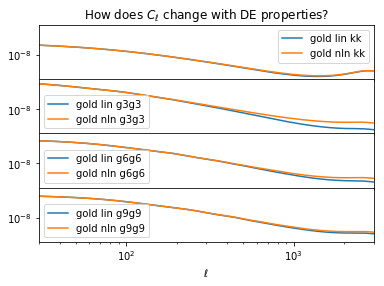

In [7]:
# plot all auto-power in one plot... ha!

# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=True)
ax1.loglog(ells,np.sqrt(covar2[0,0]),label='{0} kk'.format(label2))
ax1.loglog(ells,np.sqrt(covar4[0,0]),label='{0} kk'.format(label4))
ax1.legend()
ax1.set_title(r'How does $C_\ell$ change with DE properties?')
ax2.loglog(ells,np.sqrt(covar2[3,3]),label='{0} g3g3'.format(label2))
ax2.loglog(ells,np.sqrt(covar4[3,3]),label='{0} g3g3'.format(label4))
ax2.legend()
ax3.loglog(ells,np.sqrt(covar2[6,6]),label='{0} g6g6'.format(label2))
ax3.loglog(ells,np.sqrt(covar4[6,6]),label='{0} g6g6'.format(label4))
ax3.legend()
ax4.loglog(ells,np.sqrt(covar2[9,9]),label='{0} g9g9'.format(label2))
ax4.loglog(ells,np.sqrt(covar4[9,9]),label='{0} g9g9'.format(label4))
ax4.legend()

ax4.set_xlabel(r'$\ell$')
#ax3.ylabel(r'$\ell$')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.xlim([3e1,3e3])
plt.show()

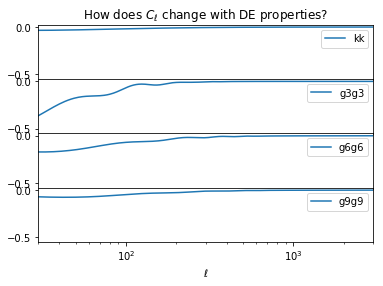

In [8]:
# plot all auto-power in one plot... ha!
w0Index = 7
delta_w0 = 0.1
scale = 1e7

# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=True)
ax1.semilogx(ells,dClVecs2[0,w0Index]*delta_w0*scale,label='kk')
ax1.legend()
ax1.set_title(r'How does $C_\ell$ change with DE properties?')
ax2.semilogx(ells,dClVecs2[3,w0Index]*delta_w0*scale,label='g3g3')
ax2.legend()
ax3.semilogx(ells,dClVecs2[6,w0Index]*delta_w0*scale,label='g6g6')
ax3.legend()
ax4.semilogx(ells,dClVecs2[9,w0Index]*delta_w0*scale,label='g9g9')
ax4.legend()

ax4.set_xlabel(r'$\ell$')
#ax3.ylabel(r'$\ell$')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.xlim([3e1,3e3])
plt.show()

In [9]:
t = np.arange(16).reshape((2,2,4))
print t
print np.diagonal(t).transpose()
print np.diagonal(t).transpose().shape

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
[[ 0  1  2  3]
 [12 13 14 15]]
(2, 4)


In [10]:
nElls = ells.__len__()
nBins = 16
nMaps = nBins+1

# get diagonals
print covar2.shape,covar4.shape
covarA = np.diagonal(covar2).transpose()[:nMaps]
covarB = np.diagonal(covar4).transpose()[:nMaps]
print covarA.shape,covarB.shape

# bin the covariance
# Ll's plan: "switch to a logarithmic binning of Delta ell/ ell = 0.2."
# -> Delta ell = 0.2*ell
covarSumD = np.zeros((nMaps,nElls))
covarSumE = np.zeros((nMaps,nElls))
covarBinnedD = np.zeros((nMaps,nElls))
covarBinnedE = np.zeros((nMaps,nElls))

for i, ell in enumerate(ells):
    #print i,ell
    deltaEll = 0.2*ell
    #print np.ceil(deltaEll), np.floor(deltaEll)
    deltaEll = np.ceil(deltaEll).astype(int)
    halfDeltaEll = np.floor(deltaEll/2).astype(int)
    for j in range(1,deltaEll):
        #covarSumD[i] += covarSumD[i+j]
        #print i,j,ell,ell-halfDeltaEll,ell+halfDeltaEll
        if ell+halfDeltaEll <= ells[-1]:
            covarSumD[:,i] += covarA[:,i-halfDeltaEll+j]
            covarSumE[:,i] += covarB[:,i-halfDeltaEll+j]
    covarBinnedD[:,i] = covarSumD[:,i]/deltaEll**2
    covarBinnedE[:,i] = covarSumE[:,i]/deltaEll**2
    print ell,' done'
    

(153, 153, 2999) (153, 153, 2999)
(17, 2999) (17, 2999)
2  done
3  done
4  done
5  done
6  done
7  done
8  done
9  done
10  done
11  done
12  done
13  done
14  done
15  done
16  done
17  done
18  done
19  done
20  done
21  done
22  done
23  done
24  done
25  done
26  done
27  done
28  done
29  done
30  done
31  done
32  done
33  done
34  done
35  done
36  done
37  done
38  done
39  done
40  done
41  done
42  done
43  done
44  done
45  done
46  done
47  done
48  done
49  done
50  done
51  done
52  done
53  done
54  done
55  done
56  done
57  done
58  done
59  done
60  done
61  done
62  done
63  done
64  done
65  done
66  done
67  done
68  done
69  done
70  done
71  done
72  done
73  done
74  done
75  done
76  done
77  done
78  done
79  done
80  done
81  done
82  done
83  done
84  done
85  done
86  done
87  done
88  done
89  done
90  done
91  done
92  done
93  done
94  done
95  done
96  done
97  done
98  done
99  done
100  done
101  done
102  done
103  done
104  done
105  done
106  done


864  done
865  done
866  done
867  done
868  done
869  done
870  done
871  done
872  done
873  done
874  done
875  done
876  done
877  done
878  done
879  done
880  done
881  done
882  done
883  done
884  done
885  done
886  done
887  done
888  done
889  done
890  done
891  done
892  done
893  done
894  done
895  done
896  done
897  done
898  done
899  done
900  done
901  done
902  done
903  done
904  done
905  done
906  done
907  done
908  done
909  done
910  done
911  done
912  done
913  done
914  done
915  done
916  done
917  done
918  done
919  done
920  done
921  done
922  done
923  done
924  done
925  done
926  done
927  done
928  done
929  done
930  done
931  done
932  done
933  done
934  done
935  done
936  done
937  done
938  done
939  done
940  done
941  done
942  done
943  done
944  done
945  done
946  done
947  done
948  done
949  done
950  done
951  done
952  done
953  done
954  done
955  done
956  done
957  done
958  done
959  done
960  done
961  done
962  done
963  done


1674  done
1675  done
1676  done
1677  done
1678  done
1679  done
1680  done
1681  done
1682  done
1683  done
1684  done
1685  done
1686  done
1687  done
1688  done
1689  done
1690  done
1691  done
1692  done
1693  done
1694  done
1695  done
1696  done
1697  done
1698  done
1699  done
1700  done
1701  done
1702  done
1703  done
1704  done
1705  done
1706  done
1707  done
1708  done
1709  done
1710  done
1711  done
1712  done
1713  done
1714  done
1715  done
1716  done
1717  done
1718  done
1719  done
1720  done
1721  done
1722  done
1723  done
1724  done
1725  done
1726  done
1727  done
1728  done
1729  done
1730  done
1731  done
1732  done
1733  done
1734  done
1735  done
1736  done
1737  done
1738  done
1739  done
1740  done
1741  done
1742  done
1743  done
1744  done
1745  done
1746  done
1747  done
1748  done
1749  done
1750  done
1751  done
1752  done
1753  done
1754  done
1755  done
1756  done
1757  done
1758  done
1759  done
1760  done
1761  done
1762  done
1763  done
1764  done

2438  done
2439  done
2440  done
2441  done
2442  done
2443  done
2444  done
2445  done
2446  done
2447  done
2448  done
2449  done
2450  done
2451  done
2452  done
2453  done
2454  done
2455  done
2456  done
2457  done
2458  done
2459  done
2460  done
2461  done
2462  done
2463  done
2464  done
2465  done
2466  done
2467  done
2468  done
2469  done
2470  done
2471  done
2472  done
2473  done
2474  done
2475  done
2476  done
2477  done
2478  done
2479  done
2480  done
2481  done
2482  done
2483  done
2484  done
2485  done
2486  done
2487  done
2488  done
2489  done
2490  done
2491  done
2492  done
2493  done
2494  done
2495  done
2496  done
2497  done
2498  done
2499  done
2500  done
2501  done
2502  done
2503  done
2504  done
2505  done
2506  done
2507  done
2508  done
2509  done
2510  done
2511  done
2512  done
2513  done
2514  done
2515  done
2516  done
2517  done
2518  done
2519  done
2520  done
2521  done
2522  done
2523  done
2524  done
2525  done
2526  done
2527  done
2528  done

In [11]:
# some bin ell-limits
lmax15 =  [   2,   84,  160,  226,  285,  337,  384,  425,  462,  496,  526,  567,  603,  644,  689,  726, 2000]
lmax30 =  [   2,  169,  320,  454,  572,  676,  768,  851,  925,  992, 1053, 1135, 1206, 1290, 1378, 1453, 2000]

labels =  ['kk' 'g1g1' 'g2g2' 'g3g3' 'g4g4' 'g5g5' 'g6g6' 'g7g7' 'g8g8' 'g9g9'
 'g10g10' 'g11g11' 'g12g12' 'g13g13' 'g14g14' 'g15g15' 'g16g16']


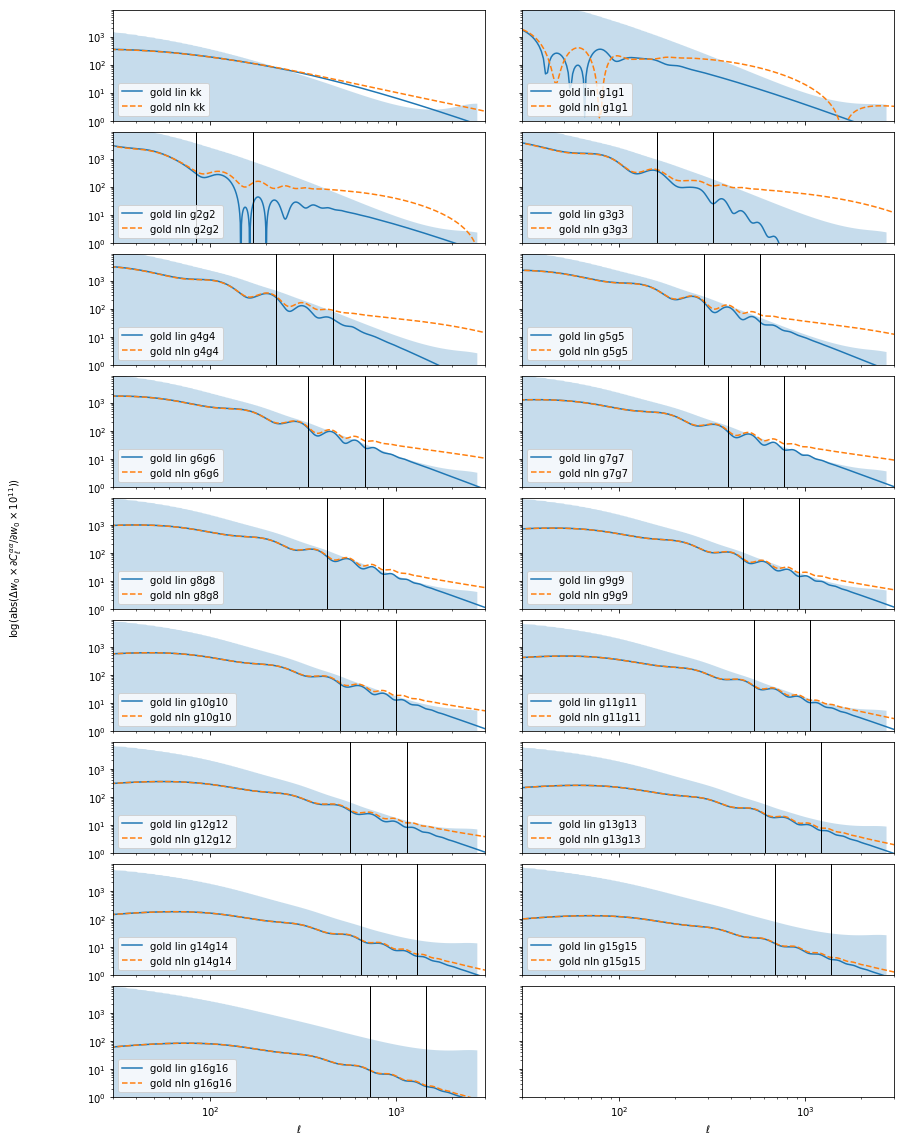

In [12]:
scale = 1e11
delta_w0 = 0.1
w0Index = 7


# make subplots
fig, axes = plt.subplots(9,2, sharex=True, sharey=True, figsize = (14,20))

labels = np.array(['kk'])
for i in range(nBins):
    labels = np.append(labels,'g{0}g{0}'.format(i+1))
print 'labels = ',labels

counter = 0
for colNum in range(9):
    for rowNum in range(2):
        if counter != 17:
            axes[colNum,rowNum].loglog(ells,np.abs(dClVecs2[counter,w0Index]*delta_w0*scale),
                                       label='{0} {1}'.format(label2,labels[counter]))
            axes[colNum,rowNum].fill_between(ells,(0+np.sqrt(covarBinnedD[counter]))*scale,
                                             (0-np.sqrt(covarBinnedD[counter]))*scale,alpha=0.25)
            axes[colNum,rowNum].loglog(ells,np.abs(dClVecs4[counter,w0Index]*delta_w0*scale),
                                       label='{0} {1}'.format(label4,labels[counter]),linestyle='--')
            #axes[colNum,rowNum].fill_between(ells,(0+np.sqrt(covarBinnedE[counter]))*scale,
            #                                 (0-np.sqrt(covarBinnedE[counter]))*scale,alpha=0.25)
            if counter != 0:
                axes[colNum,rowNum].axvline(x=lmax15[counter-1],color='k',linewidth=1)
                axes[colNum,rowNum].axvline(x=lmax30[counter-1],color='k',linewidth=1)

            axes[colNum,rowNum].legend(loc=3)
            axes[colNum,rowNum].yaxis.set_major_locator(plt.LogLocator(base=10,numticks=4))
            counter +=1
        

axes[8,0].yaxis.set_major_locator(plt.LogLocator(base=10,numticks=4))
axes[8,1].yaxis.set_major_locator(plt.LogLocator(base=10,numticks=4))
axes[8,0].set_xlabel(r'$\ell$')
axes[8,1].set_xlabel(r'$\ell$')

#ax3.ylabel(r'$\ell$')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
fig.subplots_adjust(hspace=0.1)
fig.subplots_adjust(wspace=0.1)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.xlim([3e1,3e3])
plt.ylim([1e0,9e3])
fig.text(0.02, 0.5, r'log$($abs$(\Delta w_0 \times \partial C_\ell^{{\alpha\alpha}}/\partial w_0\times 10^{11})$)', va='center', rotation='vertical')

plt.show()

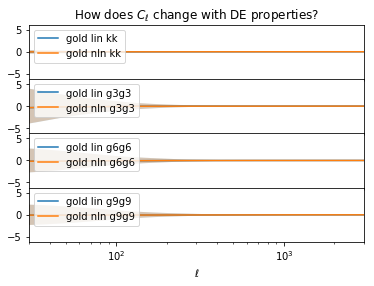

In [13]:
# plot all auto-power in one plot... ha!
w0Index = 7
delta_w0 = 0.1
scale = 1e7

# select indices for plotting
i1=0;i2=3;i3=6;i4=9
covarA = covar2[[i1,i2,i3,i4],[i1,i2,i3,i4]]
covarB = covar4[[i1,i2,i3,i4],[i1,i2,i3,i4]]

# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=True)
ax1.semilogx(ells,dClVecs2[i1,w0Index]*delta_w0*scale,label='{0} kk'.format(label2))
ax1.fill_between(ells,(dClVecs2[i1,w0Index]*delta_w0+np.sqrt(covarA[0]))*scale,
                      (dClVecs2[i1,w0Index]*delta_w0-np.sqrt(covarA[0]))*scale,
                 alpha=0.25)
ax1.semilogx(ells,dClVecs4[i1,w0Index]*delta_w0*scale,label='{0} kk'.format(label4))
ax1.fill_between(ells,(dClVecs4[i1,w0Index]*delta_w0+np.sqrt(covarB[0]))*scale,
                      (dClVecs4[i1,w0Index]*delta_w0-np.sqrt(covarB[0]))*scale,
                 alpha=0.25)
ax1.legend()
ax1.set_title(r'How does $C_\ell$ change with DE properties?')
ax2.semilogx(ells,dClVecs2[i2,w0Index]*delta_w0*scale,label='{1} g{0}g{0}'.format(i2,label2))
ax2.fill_between(ells,(0+np.sqrt(covarA[1]))*scale,
                      (0-np.sqrt(covarA[1]))*scale,
                 alpha=0.25)
ax2.semilogx(ells,dClVecs4[i2,w0Index]*delta_w0*scale,label='{1} g{0}g{0}'.format(i2,label4))
ax2.fill_between(ells,(0+np.sqrt(covarB[1]))*scale,
                      (0-np.sqrt(covarB[1]))*scale,
                 alpha=0.25)
ax2.legend()
ax3.semilogx(ells,dClVecs2[i3,w0Index]*delta_w0*scale,label='{1} g{0}g{0}'.format(i3,label2))
ax3.fill_between(ells,(0+np.sqrt(covarA[2]))*scale,
                      (0-np.sqrt(covarA[2]))*scale,
                 alpha=0.25)
ax3.semilogx(ells,dClVecs4[i3,w0Index]*delta_w0*scale,label='{1} g{0}g{0}'.format(i3,label4))
ax3.fill_between(ells,(0+np.sqrt(covarB[2]))*scale,
                      (0-np.sqrt(covarB[2]))*scale,
                 alpha=0.25)
ax3.legend()
ax4.semilogx(ells,dClVecs2[i4,w0Index]*delta_w0*scale,label='{1} g{0}g{0}'.format(i4,label2))
ax4.fill_between(ells,(0+np.sqrt(covarA[3]))*scale,
                      (0-np.sqrt(covarA[3]))*scale,
                 alpha=0.25)
ax4.semilogx(ells,dClVecs4[i4,w0Index]*delta_w0*scale,label='{1} g{0}g{0}'.format(i4,label4))
ax4.fill_between(ells,(0+np.sqrt(covarB[3]))*scale,
                      (0-np.sqrt(covarB[3]))*scale,
                 alpha=0.25)
ax4.legend()

ax4.set_xlabel(r'$\ell$')
#ax3.ylabel(r'$\ell$')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.xlim([3e1,3e3])
plt.show()

(4, 2999)
(4, 2999)
(4, 2899)
(4, 2899)
(4, 2999)
(4, 2999)


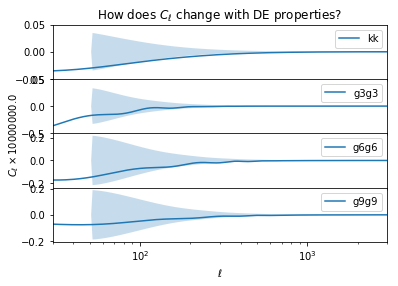

In [14]:
# error binning
bWidth = 100 # use an even number
#covar = covar2[[i1,i2,i3,i4],[i1,i2,i3,i4]]
#covar = np.array([covar2[i,i] for i in [i1,i2,i3,i4]])
print covarA.shape
print covarB.shape

# add up variances for averaging
covarSumA = np.copy(covarA)  #ugh. the need to specify 'copy' is so damn annoying.
covarSumB = np.copy(covarB)  #ugh. the need to specify 'copy' is so damn annoying.
for shift in range(1,bWidth):
    #plt.plot(covarSum[0])
    covarSumA[:,:-1*shift] += covarA[:,shift:]
    covarSumB[:,:-1*shift] += covarB[:,shift:]
    #print np.max(covarSum[0])
#plt.show()

# extract the piece I need and divide
covarBinnedA = covarSumA[:,:-1*bWidth]/bWidth**2
covarBinnedB = covarSumB[:,:-1*bWidth]/bWidth**2

print covarBinnedA.shape
print covarBinnedB.shape
zeroBlock = np.zeros((4,bWidth/2))
covarBinnedA = np.append(zeroBlock,np.append(covarBinnedA,zeroBlock,axis=1),axis=1)
covarBinnedB = np.append(zeroBlock,np.append(covarBinnedB,zeroBlock,axis=1),axis=1)
print covarBinnedA.shape
print covarBinnedB.shape



# plot all auto-power in one plot... ha!
#w0Index = 7
#delta_w0 = 0.1
#scale = 1e7

# select indices for plotting
#i1=0;i2=3;i3=6;i4=9

# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=False)
ax1.semilogx(ells,dClVecs2[i1,w0Index]*delta_w0*scale,label='kk')
ax1.fill_between(ells,(0+np.sqrt(covarBinnedA[0]))*scale,
                      (0-np.sqrt(covarBinnedA[0]))*scale,
                 alpha=0.25)
ax1.set_ylim([-0.05,0.05])
ax1.legend(loc=1)
ax1.set_title(r'How does $C_\ell$ change with DE properties?')
ax2.semilogx(ells,dClVecs2[i2,w0Index]*delta_w0*scale,label='g{0}g{0}'.format(i2))
ax2.fill_between(ells,(0+np.sqrt(covarBinnedA[1]))*scale,
                      (0-np.sqrt(covarBinnedA[1]))*scale,
                 alpha=0.25)
ax2.set_ylim([-0.5,0.5])
ax2.legend(loc=1)
ax3.semilogx(ells,dClVecs2[i3,w0Index]*delta_w0*scale,label='g{0}g{0}'.format(i3))
ax3.fill_between(ells,(0+np.sqrt(covarBinnedA[2]))*scale,
                      (0-np.sqrt(covarBinnedA[2]))*scale,
                 alpha=0.25)
ax3.legend(loc=1)
ax4.semilogx(ells,dClVecs2[i4,w0Index]*delta_w0*scale,label='g{0}g{0}'.format(i4))
ax4.fill_between(ells,(0+np.sqrt(covarBinnedA[3]))*scale,
                      (0-np.sqrt(covarBinnedA[3]))*scale,
                 alpha=0.25)
ax4.legend(loc=1)

ax4.set_xlabel(r'$\ell$')
#ax3.ylabel(r'$\ell$')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.xlim([3e1,3e3])
f.text(0.02, 0.5, r'$C_\ell\times{0}$'.format(scale), va='center', rotation='vertical')
plt.show()

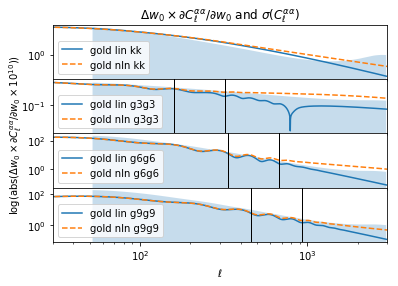

In [15]:
# try a logarithmic version
scale=1e10

# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=False)
ax1.loglog(ells,np.abs(dClVecs2[i1,w0Index]*delta_w0*scale),label='{0} kk'.format(label2))
ax1.fill_between(ells,(0+np.sqrt(covarBinnedA[0]))*scale,
                      (0-np.sqrt(covarBinnedA[0]))*scale,
                 alpha=0.25)
ax1.loglog(ells,np.abs(dClVecs4[i1,w0Index]*delta_w0*scale),label='{0} kk'.format(label4),linestyle='--')
#ax1.fill_between(ells,(0+np.sqrt(covarBinnedB[0]))*scale,
#                      (0-np.sqrt(covarBinnedB[0]))*scale,
#                 alpha=0.25)
ax1.legend(loc=3)
ax1.set_title(r'$\Delta w_0 \times \partial C_\ell^{{\alpha\alpha}}/\partial w_0$ and $\sigma( C_\ell^{\alpha\alpha})$')

ax2.loglog(ells,np.abs(dClVecs2[i2,w0Index]*delta_w0*scale),label='{1} g{0}g{0}'.format(i2,label2))
ax2.fill_between(ells,(0+np.sqrt(covarBinnedA[1]))*scale,
                      (0-np.sqrt(covarBinnedA[1]))*scale,
                 alpha=0.25)
ax2.loglog(ells,np.abs(dClVecs4[i2,w0Index]*delta_w0*scale),label='{1} g{0}g{0}'.format(i2,label4),linestyle='--')
#ax2.fill_between(ells,(0+np.sqrt(covarBinnedB[1]))*scale,
#                      (0-np.sqrt(covarBinnedB[1]))*scale,
#                 alpha=0.25)
ax2.axvline(x=lmax15[i2-1],color='k',linewidth=1)
ax2.axvline(x=lmax30[i2-1],color='k',linewidth=1)
ax2.legend(loc=3)

ax3.loglog(ells,np.abs(dClVecs2[i3,w0Index]*delta_w0*scale),label='{1} g{0}g{0}'.format(i3,label2))
ax3.fill_between(ells,(0+np.sqrt(covarBinnedA[2]))*scale,
                      (0-np.sqrt(covarBinnedA[2]))*scale,
                 alpha=0.25)
ax3.loglog(ells,np.abs(dClVecs4[i3,w0Index]*delta_w0*scale),label='{1} g{0}g{0}'.format(i3,label4),linestyle='--')
#ax3.fill_between(ells,(0+np.sqrt(covarBinnedB[2]))*scale,
#                      (0-np.sqrt(covarBinnedB[2]))*scale,
#                 alpha=0.25)
ax3.axvline(x=lmax15[i3-1],color='k',linewidth=1)
ax3.axvline(x=lmax30[i3-1],color='k',linewidth=1)
ax3.legend(loc=3)

ax4.loglog(ells,np.abs(dClVecs2[i4,w0Index]*delta_w0*scale),label='{1} g{0}g{0}'.format(i4,label2))
ax4.fill_between(ells,(0+np.sqrt(covarBinnedA[3]))*scale,
                      (0-np.sqrt(covarBinnedA[3]))*scale,
                 alpha=0.25)
ax4.loglog(ells,np.abs(dClVecs4[i4,w0Index]*delta_w0*scale),label='{1} g{0}g{0}'.format(i4,label4),linestyle='--')
#ax4.fill_between(ells,(0+np.sqrt(covarBinnedB[3]))*scale,
#                      (0-np.sqrt(covarBinnedB[3]))*scale,
#                 alpha=0.25)
ax4.axvline(x=lmax15[i4-1],color='k',linewidth=1)
ax4.axvline(x=lmax30[i4-1],color='k',linewidth=1)
ax4.legend(loc=3)




ax4.set_xlabel(r'$\ell$')
#ax3.ylabel(r'$\ell$')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.xlim([3e1,3e3])
f.text(0.02, 0.5, r'log$($abs$(\Delta w_0 \times \partial C_\ell^{{\alpha\alpha}}/\partial w_0\times 10^{10})$)', va='center', rotation='vertical')
plt.show()

In [16]:
# Lloyd says:
"""
6) Figure 2 looks really good. It is highly informative. Great to see the lmax limits and the comparison between linear and non-linear spectra. And to see the size of the impact on the spectra of a 0.1 change in w_0 compared
with the size of the errors. I think it would be good to switch to a logarithmic binning of Delta ell/ ell = 0.2. This would give a fairer visual impression of where the information is — especially since your x axis is logarithmic.
Since you chose binning of Delta ell = 100 this means taking your current error curve and dividing it by
sqrt(0.2*ell/100).
"""


'\n6) Figure 2 looks really good. It is highly informative. Great to see the lmax limits and the comparison between linear and non-linear spectra. And to see the size of the impact on the spectra of a 0.1 change in w_0 compared\nwith the size of the errors. I think it would be good to switch to a logarithmic binning of Delta ell/ ell = 0.2. This would give a fairer visual impression of where the information is \xe2\x80\x94 especially since your x axis is logarithmic.\nSince you chose binning of Delta ell = 100 this means taking your current error curve and dividing it by\nsqrt(0.2*ell/100).\n'

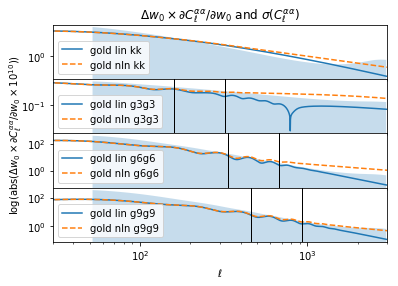

In [17]:
# with that in mind:
# try a logarithmic version
scale=1e10

covarBinnedC = covarBinnedA/(np.sqrt(0.2*ells/100))

# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=False)
ax1.loglog(ells,np.abs(dClVecs2[i1,w0Index]*delta_w0*scale),label='{0} kk'.format(label2))
ax1.fill_between(ells,(0+np.sqrt(covarBinnedC[0]))*scale,
                      (0-np.sqrt(covarBinnedC[0]))*scale,
                 alpha=0.25)
ax1.loglog(ells,np.abs(dClVecs4[i1,w0Index]*delta_w0*scale),label='{0} kk'.format(label4),linestyle='--')
#ax1.fill_between(ells,(0+np.sqrt(covarBinnedB[0]))*scale,
#                      (0-np.sqrt(covarBinnedB[0]))*scale,
#                 alpha=0.25)
ax1.legend(loc=3)
ax1.set_title(r'$\Delta w_0 \times \partial C_\ell^{{\alpha\alpha}}/\partial w_0$ and $\sigma( C_\ell^{\alpha\alpha})$')

ax2.loglog(ells,np.abs(dClVecs2[i2,w0Index]*delta_w0*scale),label='{1} g{0}g{0}'.format(i2,label2))
ax2.fill_between(ells,(0+np.sqrt(covarBinnedC[1]))*scale,
                      (0-np.sqrt(covarBinnedC[1]))*scale,
                 alpha=0.25)
ax2.loglog(ells,np.abs(dClVecs4[i2,w0Index]*delta_w0*scale),label='{1} g{0}g{0}'.format(i2,label4),linestyle='--')
#ax2.fill_between(ells,(0+np.sqrt(covarBinnedB[1]))*scale,
#                      (0-np.sqrt(covarBinnedB[1]))*scale,
#                 alpha=0.25)
ax2.axvline(x=lmax15[i2-1],color='k',linewidth=1)
ax2.axvline(x=lmax30[i2-1],color='k',linewidth=1)
ax2.legend(loc=3)

ax3.loglog(ells,np.abs(dClVecs2[i3,w0Index]*delta_w0*scale),label='{1} g{0}g{0}'.format(i3,label2))
ax3.fill_between(ells,(0+np.sqrt(covarBinnedC[2]))*scale,
                      (0-np.sqrt(covarBinnedC[2]))*scale,
                 alpha=0.25)
ax3.loglog(ells,np.abs(dClVecs4[i3,w0Index]*delta_w0*scale),label='{1} g{0}g{0}'.format(i3,label4),linestyle='--')
#ax3.fill_between(ells,(0+np.sqrt(covarBinnedB[2]))*scale,
#                      (0-np.sqrt(covarBinnedB[2]))*scale,
#                 alpha=0.25)
ax3.axvline(x=lmax15[i3-1],color='k',linewidth=1)
ax3.axvline(x=lmax30[i3-1],color='k',linewidth=1)
ax3.legend(loc=3)

ax4.loglog(ells,np.abs(dClVecs2[i4,w0Index]*delta_w0*scale),label='{1} g{0}g{0}'.format(i4,label2))
ax4.fill_between(ells,(0+np.sqrt(covarBinnedC[3]))*scale,
                      (0-np.sqrt(covarBinnedC[3]))*scale,
                 alpha=0.25)
ax4.loglog(ells,np.abs(dClVecs4[i4,w0Index]*delta_w0*scale),label='{1} g{0}g{0}'.format(i4,label4),linestyle='--')
#ax4.fill_between(ells,(0+np.sqrt(covarBinnedB[3]))*scale,
#                      (0-np.sqrt(covarBinnedB[3]))*scale,
#                 alpha=0.25)
ax4.axvline(x=lmax15[i4-1],color='k',linewidth=1)
ax4.axvline(x=lmax30[i4-1],color='k',linewidth=1)
ax4.legend(loc=3)




ax4.set_xlabel(r'$\ell$')
#ax3.ylabel(r'$\ell$')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.xlim([3e1,3e3])
f.text(0.02, 0.5, r'log$($abs$(\Delta w_0 \times \partial C_\ell^{{\alpha\alpha}}/\partial w_0\times 10^{10})$)', va='center', rotation='vertical')
plt.show()

In [18]:
# well that didn't seem to work as expected.  Try again with log-binning
"""
# add up variances for averaging
covarSumA = np.copy(covarA)  #ugh. the need to specify 'copy' is so damn annoying.
covarSumB = np.copy(covarB)  #ugh. the need to specify 'copy' is so damn annoying.
for shift in range(1,bWidth):
    #plt.plot(covarSum[0])
    covarSumA[:,:-1*shift] += covarA[:,shift:]
    covarSumB[:,:-1*shift] += covarB[:,shift:]
    #print np.max(covarSum[0])
#plt.show()

# extract the piece I need and divide
covarBinnedA = covarSumA[:,:-1*bWidth]/bWidth**2
covarBinnedB = covarSumB[:,:-1*bWidth]/bWidth**2
"""

# do this another way.
nElls = ells.__len__()
covarSumD = np.zeros((4,nElls))
covarSumE = np.zeros((4,nElls))
covarBinnedD = np.zeros((4,nElls))
covarBinnedE = np.zeros((4,nElls))


# Ll's plan: "switch to a logarithmic binning of Delta ell/ ell = 0.2."
# -> Delta ell = 0.2*ell

for i, ell in enumerate(ells):
    #print i,ell
    deltaEll = 0.2*ell
    #print np.ceil(deltaEll), np.floor(deltaEll)
    deltaEll = np.ceil(deltaEll).astype(int)
    halfDeltaEll = np.floor(deltaEll/2).astype(int)
    for j in range(1,deltaEll):
        #covarSumD[i] += covarSumD[i+j]
        #print i,j,ell,ell-halfDeltaEll,ell+halfDeltaEll
        if ell+halfDeltaEll <= ells[-1]:
            covarSumD[:,i] += covarA[:,i-halfDeltaEll+j]
            covarSumE[:,i] += covarB[:,i-halfDeltaEll+j]
    covarBinnedD[:,i] = covarSumD[:,i]/deltaEll**2
    covarBinnedE[:,i] = covarSumE[:,i]/deltaEll**2
    print ell,' done'
    
            
    
    

2  done
3  done
4  done
5  done
6  done
7  done
8  done
9  done
10  done
11  done
12  done
13  done
14  done
15  done
16  done
17  done
18  done
19  done
20  done
21  done
22  done
23  done
24  done
25  done
26  done
27  done
28  done
29  done
30  done
31  done
32  done
33  done
34  done
35  done
36  done
37  done
38  done
39  done
40  done
41  done
42  done
43  done
44  done
45  done
46  done
47  done
48  done
49  done
50  done
51  done
52  done
53  done
54  done
55  done
56  done
57  done
58  done
59  done
60  done
61  done
62  done
63  done
64  done
65  done
66  done
67  done
68  done
69  done
70  done
71  done
72  done
73  done
74  done
75  done
76  done
77  done
78  done
79  done
80  done
81  done
82  done
83  done
84  done
85  done
86  done
87  done
88  done
89  done
90  done
91  done
92  done
93  done
94  done
95  done
96  done
97  done
98  done
99  done
100  done
101  done
102  done
103  done
104  done
105  done
106  done
107  done
108  done
109  done
110  done
111  done
112  d

871  done
872  done
873  done
874  done
875  done
876  done
877  done
878  done
879  done
880  done
881  done
882  done
883  done
884  done
885  done
886  done
887  done
888  done
889  done
890  done
891  done
892  done
893  done
894  done
895  done
896  done
897  done
898  done
899  done
900  done
901  done
902  done
903  done
904  done
905  done
906  done
907  done
908  done
909  done
910  done
911  done
912  done
913  done
914  done
915  done
916  done
917  done
918  done
919  done
920  done
921  done
922  done
923  done
924  done
925  done
926  done
927  done
928  done
929  done
930  done
931  done
932  done
933  done
934  done
935  done
936  done
937  done
938  done
939  done
940  done
941  done
942  done
943  done
944  done
945  done
946  done
947  done
948  done
949  done
950  done
951  done
952  done
953  done
954  done
955  done
956  done
957  done
958  done
959  done
960  done
961  done
962  done
963  done
964  done
965  done
966  done
967  done
968  done
969  done
970  done


1681  done
1682  done
1683  done
1684  done
1685  done
1686  done
1687  done
1688  done
1689  done
1690  done
1691  done
1692  done
1693  done
1694  done
1695  done
1696  done
1697  done
1698  done
1699  done
1700  done
1701  done
1702  done
1703  done
1704  done
1705  done
1706  done
1707  done
1708  done
1709  done
1710  done
1711  done
1712  done
1713  done
1714  done
1715  done
1716  done
1717  done
1718  done
1719  done
1720  done
1721  done
1722  done
1723  done
1724  done
1725  done
1726  done
1727  done
1728  done
1729  done
1730  done
1731  done
1732  done
1733  done
1734  done
1735  done
1736  done
1737  done
1738  done
1739  done
1740  done
1741  done
1742  done
1743  done
1744  done
1745  done
1746  done
1747  done
1748  done
1749  done
1750  done
1751  done
1752  done
1753  done
1754  done
1755  done
1756  done
1757  done
1758  done
1759  done
1760  done
1761  done
1762  done
1763  done
1764  done
1765  done
1766  done
1767  done
1768  done
1769  done
1770  done
1771  done

2774  done
2775  done
2776  done
2777  done
2778  done
2779  done
2780  done
2781  done
2782  done
2783  done
2784  done
2785  done
2786  done
2787  done
2788  done
2789  done
2790  done
2791  done
2792  done
2793  done
2794  done
2795  done
2796  done
2797  done
2798  done
2799  done
2800  done
2801  done
2802  done
2803  done
2804  done
2805  done
2806  done
2807  done
2808  done
2809  done
2810  done
2811  done
2812  done
2813  done
2814  done
2815  done
2816  done
2817  done
2818  done
2819  done
2820  done
2821  done
2822  done
2823  done
2824  done
2825  done
2826  done
2827  done
2828  done
2829  done
2830  done
2831  done
2832  done
2833  done
2834  done
2835  done
2836  done
2837  done
2838  done
2839  done
2840  done
2841  done
2842  done
2843  done
2844  done
2845  done
2846  done
2847  done
2848  done
2849  done
2850  done
2851  done
2852  done
2853  done
2854  done
2855  done
2856  done
2857  done
2858  done
2859  done
2860  done
2861  done
2862  done
2863  done
2864  done

In [44]:
%matplotlib qt

# try a logarithmic version
scale=1e11

L2 = 'lin'
L4 = 'nln'

# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=True)
ax1.loglog(ells,np.abs(dClVecs2[i1,w0Index]*delta_w0*scale),label=r'{0} $\kappa\kappa$'.format(L2))
ax1.fill_between(ells,(0+np.sqrt(covarBinnedD[0]))*scale,
                      (0-np.sqrt(covarBinnedD[0]))*scale,
                 alpha=0.25)
ax1.loglog(ells,np.abs(dClVecs4[i1,w0Index]*delta_w0*scale),label=r'{0} $\kappa\kappa$'.format(L4),linestyle='--')
#ax1.fill_between(ells,(0+np.sqrt(covarBinnedE[0]))*scale,
#                      (0-np.sqrt(covarBinnedE[0]))*scale,
#                 alpha=0.25)
ax1.legend(loc=3)
ax1.yaxis.set_major_locator(plt.LogLocator(base=10,numticks=4))
ax1.set_title(r'$\Delta w_0 \times \partial C_\ell^{{\alpha\alpha}}/\partial w_0$ and $\sigma( C_\ell^{\alpha\alpha})$ with LSST Gold')

ax2.loglog(ells,np.abs(dClVecs2[i2,w0Index]*delta_w0*scale),label=r'{1} $g_{0}g_{0}$'.format(i2,L2))
ax2.fill_between(ells,(0+np.sqrt(covarBinnedD[1]))*scale,
                      (0-np.sqrt(covarBinnedD[1]))*scale,
                 alpha=0.25)
ax2.loglog(ells,np.abs(dClVecs4[i2,w0Index]*delta_w0*scale),label=r'{1} $g_{0}g_{0}$'.format(i2,L4),linestyle='--')
#ax2.fill_between(ells,(0+np.sqrt(covarBinnedE[1]))*scale,
#                      (0-np.sqrt(covarBinnedE[1]))*scale,
#                 alpha=0.25)
ax2.axvline(x=lmax15[i2-1],color='k',linewidth=1)
ax2.axvline(x=lmax30[i2-1],color='k',linewidth=1)
ax2.legend(loc=3)
ax2.yaxis.set_major_locator(plt.LogLocator(base=10,numticks=4))

ax3.loglog(ells,np.abs(dClVecs2[i3,w0Index]*delta_w0*scale),label=r'{1} $g_{0}g_{0}$'.format(i3,L2))
ax3.fill_between(ells,(0+np.sqrt(covarBinnedD[2]))*scale,
                      (0-np.sqrt(covarBinnedD[2]))*scale,
                 alpha=0.25)
ax3.loglog(ells,np.abs(dClVecs4[i3,w0Index]*delta_w0*scale),label=r'{1} $g_{0}g_{0}$'.format(i3,L4),linestyle='--')
#ax3.fill_between(ells,(0+np.sqrt(covarBinnedE[2]))*scale,
#                      (0-np.sqrt(covarBinnedE[2]))*scale,
#                 alpha=0.25)
ax3.axvline(x=lmax15[i3-1],color='k',linewidth=1)
ax3.axvline(x=lmax30[i3-1],color='k',linewidth=1)
ax3.legend(loc=3)
ax3.yaxis.set_major_locator(plt.LogLocator(base=10,numticks=4))

ax4.loglog(ells,np.abs(dClVecs2[i4,w0Index]*delta_w0*scale),label=r'{1} $g_{0}g_{0}$'.format(i4,L2))
ax4.fill_between(ells,(0+np.sqrt(covarBinnedD[3]))*scale,
                      (0-np.sqrt(covarBinnedD[3]))*scale,
                 alpha=0.25)
ax4.loglog(ells,np.abs(dClVecs4[i4,w0Index]*delta_w0*scale),label=r'{1} $g_{0}g_{0}$'.format(i4,L4),linestyle='--')
#ax4.fill_between(ells,(0+np.sqrt(covarBinnedE[3]))*scale,
#                      (0-np.sqrt(covarBinnedE[3]))*scale,
#                 alpha=0.25)
ax4.axvline(x=lmax15[i4-1],color='k',linewidth=1)
ax4.axvline(x=lmax30[i4-1],color='k',linewidth=1)
ax4.legend(loc=3)
#ax4.yaxis.set_major_locator(plt.MaxNLocator(2))
ax4.yaxis.set_major_locator(plt.LogLocator(base=10,numticks=4))
ax4.yaxis.set_major_formatter(plt.FixedFormatter(['','',r'$10^1$',r'$10^2$',r'$10^3$'])) # not sure why two ''s needed


ax4.set_xlabel(r'$\ell$',fontsize=15)
#ax3.ylabel(r'$\ell$')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.xlim([3e1,3e3])
plt.ylim([1e0,9e3])
#f.text(0.02, 0.5, r'log$($abs$(\Delta w_0 \times \partial C_\ell^{{\alpha\alpha}}/\partial w_0\times 10^{11})$)', va='center', rotation='vertical',fontsize=15)
f.text(0.02, 0.5, r'log$($abs$(\Delta C_\ell^{{\alpha\alpha}} \times 10^{11})$)', va='center', rotation='vertical',fontsize=15)
plt.show()

In [20]:
# look at Cls and ClsPlus and ClsMinus

# get copies of the Cls from the objects
crossCls2 = np.copy(Fobj2.crossCls)
crossClsP2 = np.copy(Fobj2.crossClsP)
crossCls4 = np.copy(Fobj4.crossCls)
crossClsP4 = np.copy(Fobj4.crossClsP)

crossClsPlus2 = np.copy(Fobj2.crossClsPlus)
crossClsPPlus2 = np.copy(Fobj2.crossClsPPlus)
crossClsPlus4 = np.copy(Fobj4.crossClsPlus)
crossClsPPlus4 = np.copy(Fobj4.crossClsPPlus)

crossClsMinus2 = np.copy(Fobj2.crossClsMinus)
crossClsPMinus2 = np.copy(Fobj2.crossClsPMinus)
crossClsMinus4 = np.copy(Fobj4.crossClsMinus)
crossClsPMinus4 = np.copy(Fobj4.crossClsPMinus)

print crossCls2.shape, crossClsP2.shape
print crossCls4.shape, crossClsP4.shape
print crossClsPlus2.shape, crossClsPPlus2.shape
print crossClsPlus4.shape, crossClsPPlus4.shape
print crossClsMinus2.shape, crossClsPMinus2.shape
print crossClsMinus4.shape, crossClsPMinus4.shape

(17, 17, 2999) (2, 2, 4999)
(17, 17, 2999) (2, 2, 4999)
(17, 17, 9, 2999) (2, 2, 9, 4999)
(17, 17, 9, 2999) (2, 2, 9, 4999)
(17, 17, 9, 2999) (2, 2, 9, 4999)
(17, 17, 9, 2999) (2, 2, 9, 4999)


In [21]:
# get diagonals

crossCls2diag = np.diagonal(crossCls2).transpose()
crossCls4diag = np.diagonal(crossCls4).transpose()
crossClsPlus2diag = np.diagonal(crossClsPlus2).transpose()
crossClsPlus4diag = np.diagonal(crossClsPlus4).transpose()
crossClsMinus2diag = np.diagonal(crossClsMinus2).transpose()
crossClsMinus4diag = np.diagonal(crossClsMinus4).transpose()

print crossCls2diag.shape
print crossCls4diag.shape
print crossClsPlus2diag.shape
print crossClsPlus4diag.shape
print crossClsMinus2diag.shape
print crossClsMinus4diag.shape


(17, 2999)
(17, 2999)
(17, 2999, 9)
(17, 2999, 9)
(17, 2999, 9)
(17, 2999, 9)


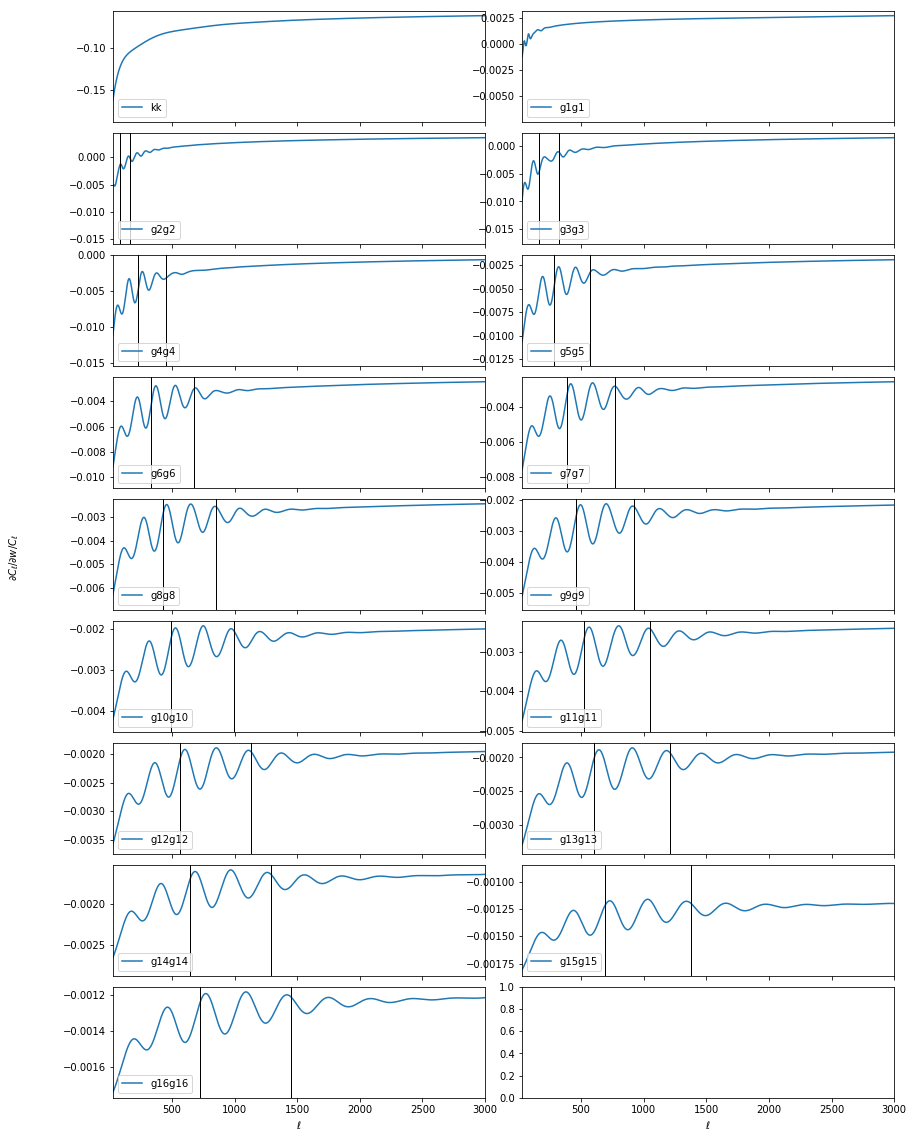

In [22]:
# make plot
# make subplots
fig, axes = plt.subplots(9,2, sharex=True, sharey=False, figsize = (14,20))

#labels = np.array(['kk'])
#for i in range(nBins):
#    labels = np.append(labels,'g{0}g{0}'.format(i+1))
#print 'labels = ',labels

counter = 0
for colNum in range(9):
    for rowNum in range(2):
        if counter != 17:
            # plot the Cls
            #axes[colNum,rowNum].loglog(ells,crossClsPlus2diag[counter,:,w0Index],linestyle='--',
            #                           label='{0} Minus'.format(labels[counter]))
            #axes[colNum,rowNum].loglog(ells,crossCls2diag[counter],linestyle='-',
            #                           label='{0} Fid'.format(labels[counter]))
            #axes[colNum,rowNum].loglog(ells,crossClsMinus2diag[counter,:,w0Index],linestyle='-.',
            #                           label='{0} Plus'.format(labels[counter]))
            
            # plot the derivatives/Cls
            axes[colNum,rowNum].plot(ells,dClVecs2[counter,w0Index]/crossCls2diag[counter],label='{0}'.format(labels[counter]))
            
            if counter != 0:
                axes[colNum,rowNum].axvline(x=lmax15[counter-1],color='k',linewidth=1)
                axes[colNum,rowNum].axvline(x=lmax30[counter-1],color='k',linewidth=1)

            axes[colNum,rowNum].legend(loc=3)
            #axes[colNum,rowNum].yaxis.set_major_locator(plt.LogLocator(base=10,numticks=4))
            counter +=1
        

#axes[8,0].yaxis.set_major_locator(plt.LogLocator(base=10,numticks=4))
#axes[8,1].yaxis.set_major_locator(plt.LogLocator(base=10,numticks=4))
axes[8,0].set_xlabel(r'$\ell$')
axes[8,1].set_xlabel(r'$\ell$')

#ax3.ylabel(r'$\ell$')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
fig.subplots_adjust(hspace=0.1)
fig.subplots_adjust(wspace=0.1)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.xlim([3e1,3e3])
#plt.ylim([1e0,9e3])
#fig.text(0.02, 0.5, r'$C_\ell(w-\Delta w), C_\ell(w), C_\ell(w+\Delta w)$', va='center', rotation='vertical')
fig.text(0.02, 0.5, r'$\partial C_\ell/\partial w / C_\ell$', va='center', rotation='vertical')

plt.show()

In [23]:
# make chi(z) functions
def getPk(Fobj):
    return cp.MatterPower(nz=Fobj.nz,AccuracyBoost=Fobj.AccuracyBoost,nonlinear=Fobj.nonlinear,**Fobj.cosParams)
def getWin(Fobj,myPk):
    return cp.Window(myPk,zmin=Fobj.zmin,zmax=Fobj.zmax,nBins=Fobj.nBins,
               biasK=cp.ones,biasG=cp.byeBias,dndzMode=Fobj.dndzMode,z0=Fobj.z0,
               doNorm=Fobj.doNorm,useWk=Fobj.useWk,BPZ=Fobj.BPZ,binSmooth=Fobj.binSmooth,
               biasByBin=Fobj.biasByBin)

cosParams = {
        'H0'    : None, #67.51, #setting H0=None allows cosmomc_theta to be used instead
        'cosmomc_theta'           : 1.04087e-2,
        'ombh2' : 0.02226,
        'omch2' : 0.1193,
        'omk'   : 0,
        'tau'   : 0.063,

        'As'    : 2.130e-9,
        'ns'    : 0.9653,
        'r'     : 0,
        'kPivot': 0.05,

        #'w'     : -1.0, # DARK ENERGY!!!
        'w'     : -0.95, # DARK ENERGY!!!
        'wa'    : 0.0,

        'mnu'   : 0.06, # (eV)
        'nnu'   : 3.046,
        'standard_neutrino_neff'  : 3.046,
        'num_massive_neutrinos'   : 1, #this param should be ignored except in degenerate hierarchy
        'neutrino_hierarchy'      : 'degenerate'}
cosParamsPlus = {
        'H0'    : None, #67.51, #setting H0=None allows cosmomc_theta to be used instead
        'cosmomc_theta'           : 1.04087e-2,
        'ombh2' : 0.02226,
        'omch2' : 0.1193,
        'omk'   : 0,
        'tau'   : 0.063,

        'As'    : 2.130e-9,
        'ns'    : 0.9653,
        'r'     : 0,
        'kPivot': 0.05,

        #'w'     : -1.0, # DARK ENERGY!!!
        #'w'     : -0.95, # DARK ENERGY!!!
        'w'     : -0.9, # DARK ENERGY!!!
        'wa'    : 0.0,

        'mnu'   : 0.06, # (eV)
        'nnu'   : 3.046,
        'standard_neutrino_neff'  : 3.046,
        'num_massive_neutrinos'   : 1, #this param should be ignored except in degenerate hierarchy
        'neutrino_hierarchy'      : 'degenerate'}
cosParamsMinus = {
        'H0'    : None, #67.51, #setting H0=None allows cosmomc_theta to be used instead
        'cosmomc_theta'           : 1.04087e-2,
        'ombh2' : 0.02226,
        'omch2' : 0.1193,
        'omk'   : 0,
        'tau'   : 0.063,

        'As'    : 2.130e-9,
        'ns'    : 0.9653,
        'r'     : 0,
        'kPivot': 0.05,

        'w'     : -1.0, # DARK ENERGY!!!
        #'w'     : -0.95, # DARK ENERGY!!!
        'wa'    : 0.0,

        'mnu'   : 0.06, # (eV)
        'nnu'   : 3.046,
        'standard_neutrino_neff'  : 3.046,
        'num_massive_neutrinos'   : 1, #this param should be ignored except in degenerate hierarchy
        'neutrino_hierarchy'      : 'degenerate'}

In [24]:
print 'starting myPkMinus...'
myPkMinus = cp.MatterPower(nz=Fobj2.nz,AccuracyBoost=Fobj2.AccuracyBoost,nonlinear=Fobj2.nonlinear,**cosParamsMinus)
print 'starting myPkFid...'
myPkFid = cp.MatterPower(nz=Fobj2.nz,AccuracyBoost=Fobj2.AccuracyBoost,nonlinear=Fobj2.nonlinear,**cosParams)
print 'starting myPkPlus...'
myPkPlus = cp.MatterPower(nz=Fobj2.nz,AccuracyBoost=Fobj2.AccuracyBoost,nonlinear=Fobj2.nonlinear,**cosParamsPlus)
print 'done.'

starting myPkMinus...
neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
starting myPkFid...
neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
starting myPkPlus...
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
done.


In [25]:
chiOfZMinus = myPkMinus.getChiofZ()
chiOfZFid = myPkFid.getChiofZ()
chiOfZPlus = myPkPlus.getChiofZ()

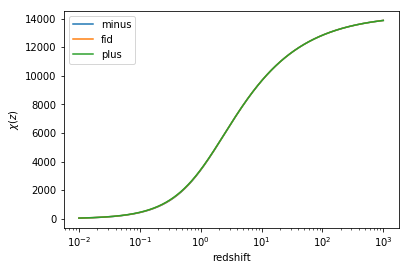

In [26]:
# just plot them
myZs = np.logspace(-2,3,1000)
chiMinus = chiOfZMinus(myZs)
chiFid = chiOfZFid(myZs)
chiPlus = chiOfZPlus(myZs)

plt.semilogx(myZs,chiMinus,label='minus')
plt.semilogx(myZs,chiFid,label='fid')
plt.semilogx(myZs,chiPlus,label='plus')
plt.xlabel('redshift')
plt.ylabel(r'$\chi(z)$')
plt.legend()
plt.show()


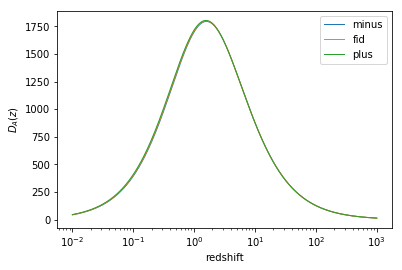

In [27]:
# just plot them
myZs = np.logspace(-2,3,1000)
chiMinus = chiOfZMinus(myZs)
chiFid = chiOfZFid(myZs)
chiPlus = chiOfZPlus(myZs)

plt.semilogx(myZs,chiMinus/(1+myZs),label='minus',linewidth=1)
plt.semilogx(myZs,chiFid/(1+myZs),label='fid',linewidth=1)
plt.semilogx(myZs,chiPlus/(1+myZs),label='plus',linewidth=1)
plt.xlabel('redshift')
plt.ylabel(r'$D_A(z)$')
plt.legend()
plt.show()


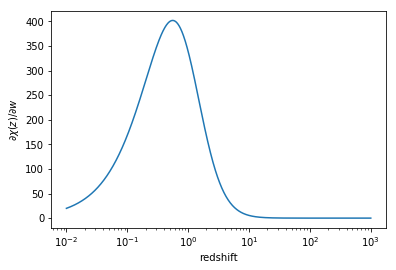

In [28]:
# plot derivative
plt.semilogx(myZs,(chiPlus-chiMinus)/0.1)
plt.xlabel('redshift')
plt.ylabel(r'$\partial \chi(z)/\partial w$')
plt.show()

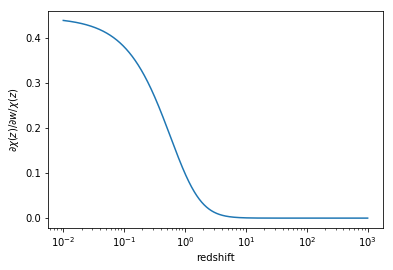

In [29]:
# plot log derivative
plt.semilogx(myZs,(chiPlus-chiMinus)/0.1/chiFid)
plt.xlabel('redshift')
plt.ylabel(r'$\partial \chi(z)/\partial w/\chi(z)$')
plt.show()

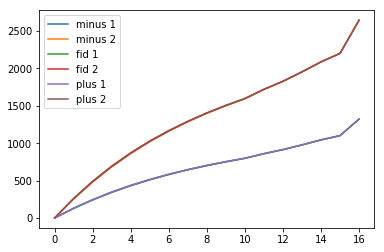

In [30]:
binEdges = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 
                  2.3, 2.6, 3.0, 3.5, 4.0, 7.0]
myLmaxMinus = lambda kmax: np.floor(kmax*chiOfZMinus(binEdges)-0.5).astype(int)
myLmaxFid = lambda kmax: np.floor(kmax*chiOfZFid(binEdges)-0.5).astype(int)
myLmaxPlus = lambda kmax: np.floor(kmax*chiOfZPlus(binEdges)-0.5).astype(int)

kmax1 = 0.15
kmax2 = 0.30

lmaxMinus1 = myLmaxMinus(kmax1)
lmaxMinus2 = myLmaxMinus(kmax2)
lmaxFid1 = myLmaxFid(kmax1)
lmaxFid2 = myLmaxFid(kmax2)
lmaxPlus1 = myLmaxPlus(kmax1)
lmaxPlus2 = myLmaxPlus(kmax2)

plt.plot(lmaxMinus1,label='minus 1')
plt.plot(lmaxMinus2,label='minus 2')
plt.plot(lmaxFid1,label='fid 1')
plt.plot(lmaxFid2,label='fid 2')
plt.plot(lmaxPlus1,label='plus 1')
plt.plot(lmaxPlus2,label='plus 2')
plt.legend()
plt.show()

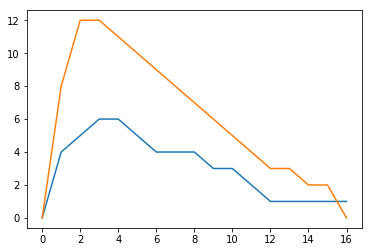

In [31]:
plt.plot(lmaxPlus1-lmaxMinus1)
plt.plot(lmaxPlus2-lmaxMinus2)
plt.show()

In [5]:
print Fobj2.crossCls.shape

(17, 17, 2999)


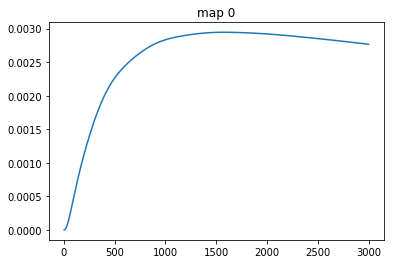

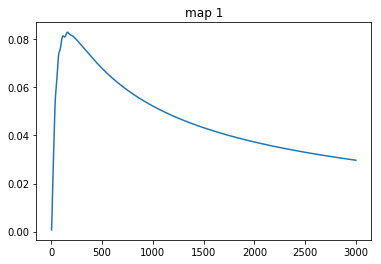

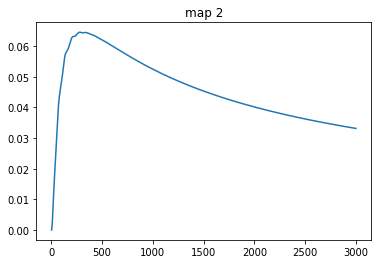

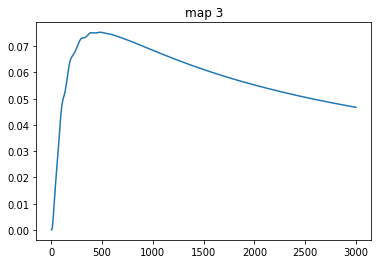

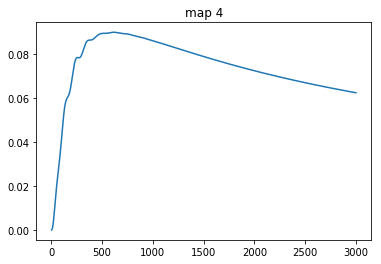

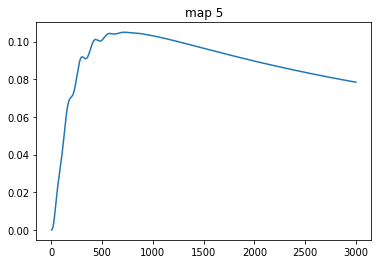

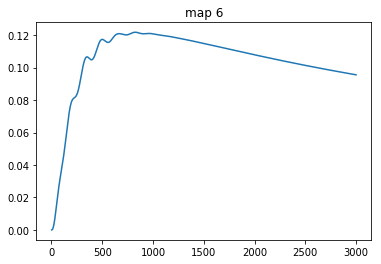

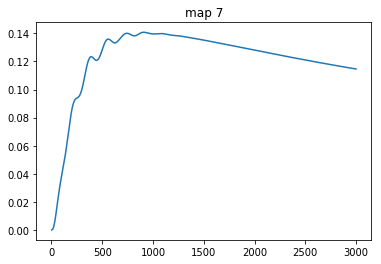

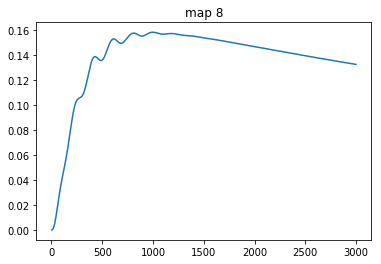

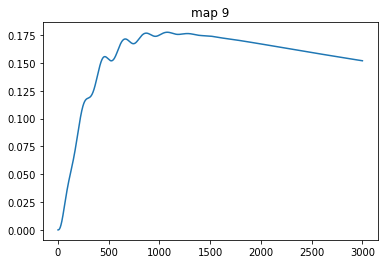

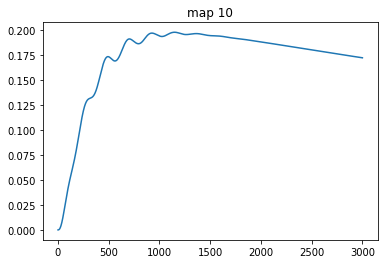

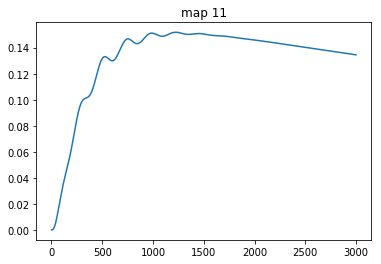

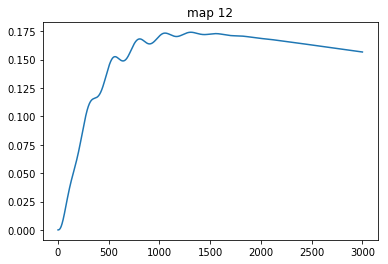

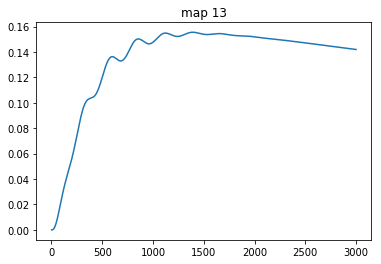

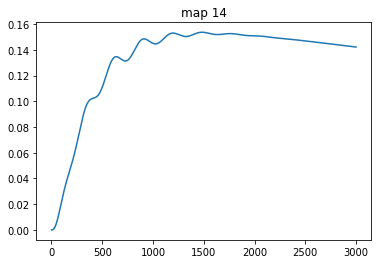

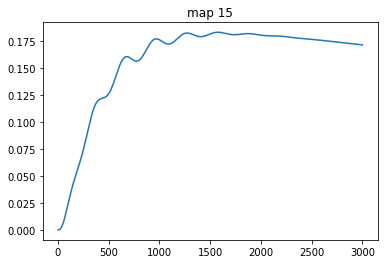

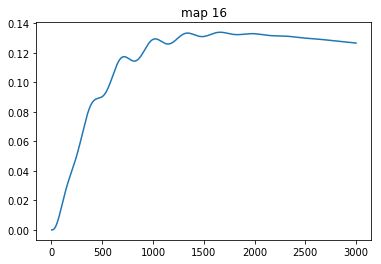

In [7]:
for mapNum in range(17):
    plt.plot(Fobj2.ells,Fobj2.crossCls[mapNum,mapNum]*(Fobj2.ells*(Fobj2.ells+1))/np.pi)
    plt.title('map {0}'.format(mapNum))
    plt.show()

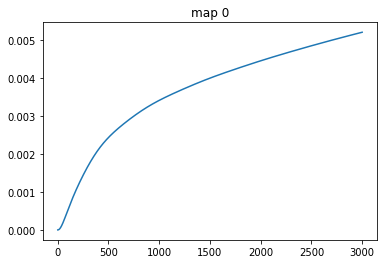

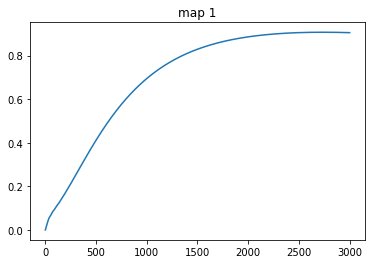

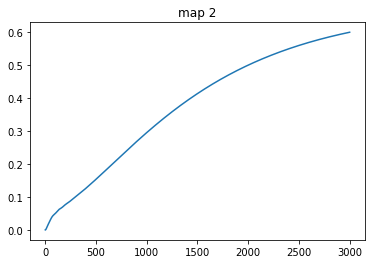

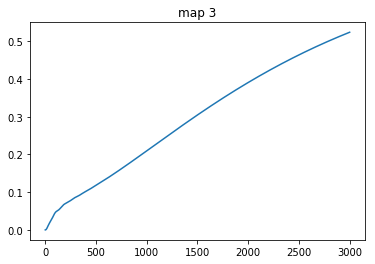

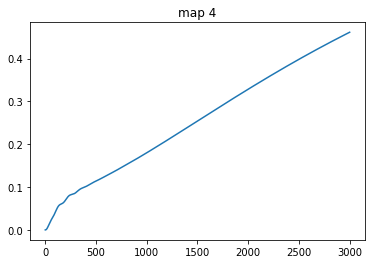

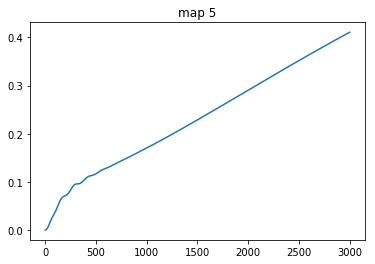

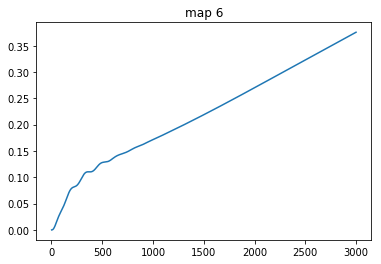

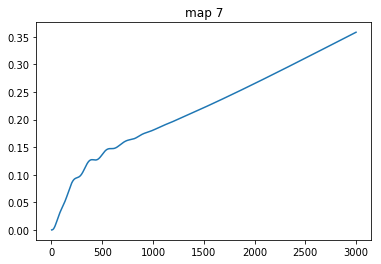

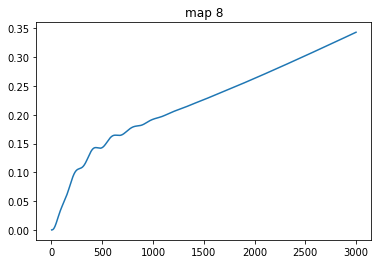

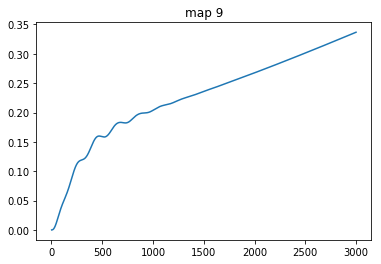

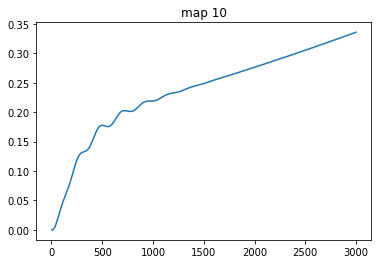

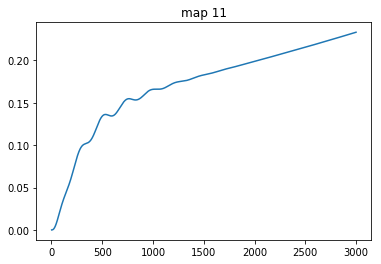

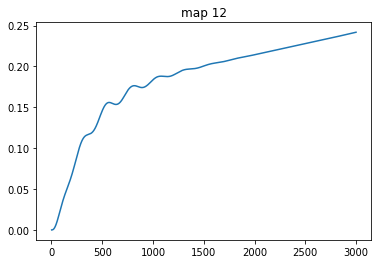

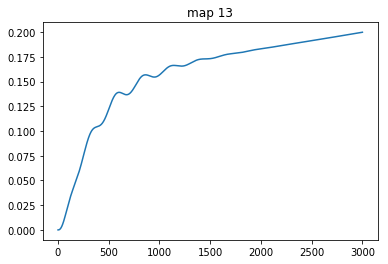

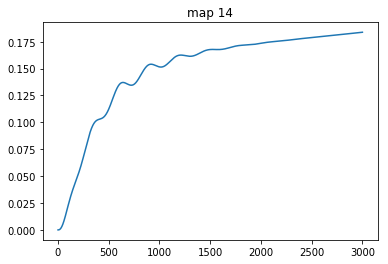

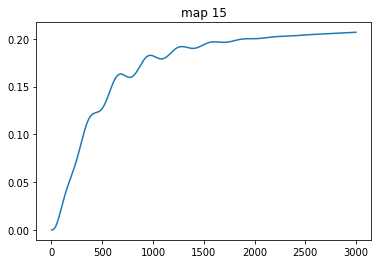

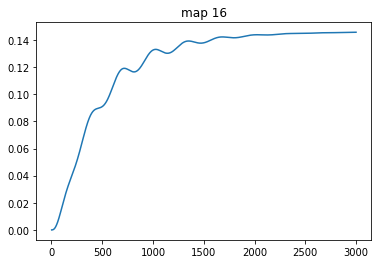

In [8]:
for mapNum in range(17):
    plt.plot(Fobj4.ells,Fobj4.crossCls[mapNum,mapNum]*(Fobj4.ells*(Fobj4.ells+1))/np.pi)
    plt.title('map {0}'.format(mapNum))
    plt.show()

# Plot linear and nonlinear P(z,k) together and check differences

In [8]:
import camb 

# get MatterPower objects
# get params for MatterPower from FisherMatrix:
def getPk(Fobj):
    return cp.MatterPower(nz=Fobj.nz,AccuracyBoost=Fobj.AccuracyBoost,nonlinear=Fobj.nonlinear,**Fobj.cosParams)
def getWin(Fobj,myPk):
    return cp.Window(myPk,zmin=Fobj.zmin,zmax=Fobj.zmax,nBins=Fobj.nBins,
               biasK=cp.ones,biasG=cp.byeBias,dndzMode=Fobj.dndzMode,z0=Fobj.z0,
               doNorm=Fobj.doNorm,useWk=Fobj.useWk,BPZ=Fobj.BPZ,binSmooth=Fobj.binSmooth,
               biasByBin=Fobj.biasByBin)

# set Halofit version
print 'setting Halofit to Casarini (Halofit ver. 7)'
camb.set_halofit_version('casarini')

print 'get linear P(k)...'
myPk2 = getPk(Fobj2)
print 'get nonlinear P(k)...'
myPk4 = getPk(Fobj4)

#chiOfZ2 = myPk2.getChiofZ()
#chiOfZ4 = myPk4.getChiofZ()

print 'done.'

setting Halofit to Casarini (Halofit ver. 7)
get linear P(k)...
neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
get nonlinear P(k)...
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
done.


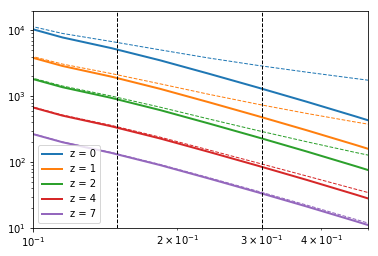

In [26]:
# get some k values for plotting
myKs = np.logspace(-4,1)

# get some redshifts
myZs = [0,1,2,4,7]
# some colors
colors=['C0','C1','C2','C3','C4']
for zNum, myZ in enumerate(myZs):
    plt.loglog(myKs,myPk2.PK.P(myZ,myKs),linestyle='-',linewidth=2,color=colors[zNum],label='z = {0}'.format(myZ))
    plt.loglog(myKs,myPk4.PK.P(myZ,myKs),linestyle='--',linewidth=1,color=colors[zNum])
    
plt.axvline(x=0.15,color='k',linestyle='--',linewidth=1)
plt.axvline(x=0.30,color='k',linestyle='--',linewidth=1)
plt.xlim([1e-1,5e-1])
plt.ylim([1e1,2e4])
plt.legend()
plt.show()

In [31]:
# nice picture.  now get numeric values
pzkVals = np.zeros((5,2,2)) # 5 redshifts, 2 kVals, 2 lin/nonlin
myKVals = [0.15,0.3]
for kNum,myK in enumerate(myKVals):
    for zNum,myZ in enumerate(myZs):
        pzkVals[zNum,kNum,0] = myPk2.PK.P(myZ,myK)
        pzkVals[zNum,kNum,1] = myPk4.PK.P(myZ,myK)
        
print pzkVals

[[[5023.57874085 6457.59217157]
  [1307.41254544 2885.27485304]]

 [[1853.65211559 2086.19143878]
  [ 482.46736793  738.43078289]]

 [[ 882.07895657  946.49637064]
  [ 229.59672961  292.58893971]]

 [[ 326.81700661  338.04187261]
  [  85.07065673   93.93828128]]

 [[ 128.87153202  131.19046644]
  [  33.54612269   34.915588  ]]]


In [32]:
# percent differences
perDiff = (pzkVals[:,:,1]-pzkVals[:,:,0])/pzkVals[:,:,0]*100
print perDiff

[[ 28.5456545  120.68587785]
 [ 12.544928    53.05300047]
 [  7.30290793  27.43602237]
 [  3.43460278  10.42383461]
 [  1.79941558   4.0823356 ]]
